### Why Scikit-Learn?
- Built on Numpy and Matplotlib (and Python)
- Has many in-built machine learning models
- Methods to evaluate your machine learning models
- Very well-designed API

### What we are going to cover?
1. Get data ready
2. Pick a model (to suit your problem)
3. Fit a model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

### In-depth overview of this section 

- An end-to-end Scikit-Learn workflow
- Getting data ready (to be used with machine learning models)
- Choosing a machine learning model/estimator/algorithm for our problem
- Fitting a model/estimator/algorithm to the data (learning patterns)
- Making predictions with the model (using learned patterns)
- Evaluating model predictions
- Improving model predictions
- Saving and loading models
- Putting it all together!

### Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

### 0. An end-to-end Scikit-Learn workflow 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

In [2]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Check for missing values 

In [3]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Check for data types

In [4]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [6]:
# 2. Choose the right model and hyperparameters
clf = RandomForestClassifier() # Keep the default hyperparameters for now

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the training data and make predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% of the data will be used for training

In [8]:
clf.fit(X_train, y_train);

In [9]:
y_preds = clf.predict(X_test)
y_preds, y_preds.shape

(array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64),
 (61,))

In [10]:
y_test

51     1
292    0
63     1
100    1
114    1
      ..
267    0
139    1
145    1
236    0
163    1
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.8032786885245902

In [13]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [14]:
print(confusion_matrix(y_test, y_preds))

[[21  7]
 [ 5 28]]


In [15]:
print(accuracy_score(y_test, y_preds)) # same as clf.score(X_test, y_test)

0.8032786885245902


In [16]:
# 5. Improve (tune) the model
np.random.seed(42)
for i in range(10, 110, 10):
    print(f'Trying RandomForestClassifier with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%')
    print()

Trying RandomForestClassifier with 10 estimators...
Model accuracy on test set: 77.05%

Trying RandomForestClassifier with 20 estimators...
Model accuracy on test set: 75.41%

Trying RandomForestClassifier with 30 estimators...
Model accuracy on test set: 78.69%

Trying RandomForestClassifier with 40 estimators...
Model accuracy on test set: 78.69%

Trying RandomForestClassifier with 50 estimators...
Model accuracy on test set: 77.05%

Trying RandomForestClassifier with 60 estimators...
Model accuracy on test set: 78.69%

Trying RandomForestClassifier with 70 estimators...
Model accuracy on test set: 80.33%

Trying RandomForestClassifier with 80 estimators...
Model accuracy on test set: 78.69%

Trying RandomForestClassifier with 90 estimators...
Model accuracy on test set: 80.33%

Trying RandomForestClassifier with 100 estimators...
Model accuracy on test set: 80.33%



In [17]:
# 6. Save a model and load it
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb')) # wb means write binary

In [18]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb')) # rb means read binary
loaded_model.score(X_test, y_test)

0.8032786885245902

## Deep dive into steps for a Machine Learning Project 

### 1. Getting the data ready to be used with machine learning
Three main things we have to do:
1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values.
3. Converting non-numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical 

In [24]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')

#### Check for missing values 

In [25]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split into X,y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

#### Got the above error because RandomForest expects numerical values as inputs 

In [31]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

#### The above cell suggests that even though Doors is an int, it can be treated as a categorical variable because of its extremely limited value counts 

In [32]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder='passthrough')

In [33]:
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_train

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.4645e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        9.0110e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        9.4941e+04],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        9.8523e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.2490e+05],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.8738e+05]])

In [34]:
transformed_X_test = transformer.transform(X_test)
transformed_X_test

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.02773e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.13060e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 5.13280e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.33450e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.97610e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.05837e+05]])

# Always use fit_transform on X_Train and transform and X_test. We must remain blind to the test set at all times to avoid bias. 

In [35]:
np.random.seed(42)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.07644657901460727

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputing).
2. Remove the samples missing data altogether.

In [36]:
# Import car sales missing data
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum() # Shows number of missing values per column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Dropping rows with missing labels
car_sales_missing.dropna(subset=['Price'], inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
# Create X and y
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
# Let's try and convert our data to numbers
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder='passthrough')

transformed_X_train = transformer.fit_transform(X_train)
transformed_X_train

ValueError: Input contains NaN

### OneHot Encoding cannot be applied to dataframe if it has Nan values in columns that are being encoded 

### Dealing with missing data 

#### Option1: Fill missing data with Pandas 

In [43]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')

In [44]:
# Remove rows with missing labels
car_sales_missing.dropna(subset=['Price'],inplace=True)

In [45]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [46]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [47]:
y.isna().sum()

0

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [49]:
X_train['Make'].fillna('missing', inplace=True)
X_train['Colour'].fillna('missing', inplace=True)
X_train['Doors'].fillna(4, inplace=True)
X_train['Odometer (KM)'].fillna(X_train['Odometer (KM)'].mean(), inplace=True)
print(X_train.isna().sum())

X_test['Make'].fillna('missing', inplace=True)
X_test['Colour'].fillna('missing', inplace=True)
X_test['Doors'].fillna(4, inplace=True)
X_test['Odometer (KM)'].fillna(X_train['Odometer (KM)'].mean(), inplace=True) # Notice that we used X_train.mean(), this is similar to appyling fit transform on train followed by transform on test
print(X_test.isna().sum())

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64


C:\Users\Administrator\Desktop\Data-Science-Legwork\ZTM-Data-Science\env\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [50]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder='passthrough')

transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

In [51]:
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test,y_test)

0.24748582992543233

### Option 2: Fill missing data with Scikit-Learn 

#### Always deal with missing values first, then apply onehotencoding 

In [52]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [55]:
# Remove rows that don't have target variable (label)
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [57]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [58]:
y.isna().sum()

0

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [60]:
# Fill missing values with Scikit-Learn

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# Create an transformer
transformer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature),
]
)


# Transform the data
filled_X_train = transformer.fit_transform(X_train)
filled_X_test = transformer.transform(X_test)

In [61]:
X_train_filled = pd.DataFrame(filled_X_train, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
X_train_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,White,4,231683
1,Honda,White,4,42844
2,Honda,Blue,4,171303
3,Honda,White,4,128631
4,Toyota,Black,4,43171


In [62]:
X_test_filled = pd.DataFrame(filled_X_test, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
X_test_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Nissan,White,3,213449
1,Toyota,White,4,142633
2,Toyota,White,4,239554
3,Toyota,Blue,4,48684
4,Nissan,White,4,193874


In [63]:
print(X_train_filled.isna().sum())
print(X_train_filled.dtypes)

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64
Make             object
Colour           object
Doors            object
Odometer (KM)    object
dtype: object


In [64]:
print(X_test_filled.isna().sum())
print(X_train_filled.dtypes)

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64
Make             object
Colour           object
Doors            object
Odometer (KM)    object
dtype: object


In [65]:
# Turn the categories into numbers

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder='passthrough')

transformed_X_train = transformer.fit_transform(X_train_filled)
transformed_X_test = transformer.transform(X_test_filled)

In [66]:
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.27190201650503054

In [67]:
what_were_covering = [
    '0. An end-to-end Scikit-Learn workflow',
    '1. Getting the data ready',
    '2. Choose the right estimator/algorithm for our problems',
    '3. Fit the model/algorithm and use it to make predictions on our data',
    '4. Evaluating a model',
    '5. Improve a model',
    '6. Save and load a trained model',
    '7. Putting it all together'
]

### Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predictind whether a sample is one thing or another
* Regression - predicting a number


* Step 1 - Refer the ML-map below

<img src='sklearn-ml-map.png'>

### 2.1 Picking a machine learning model for a regression problem 

In [68]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [69]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [70]:
# How many samples?
len(boston_df)

506

In [71]:
# Missing values?
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [72]:
# Data types
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

#### According to the ml-map, ridge regression looks promising 

In [73]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the ridge model on test data
model.score(X_test, y_test)

0.6662221670168519

How do we improve this score?

What if Ridge wasn't working?

Refer - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [74]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8471696005277883

In [75]:
pd.read_csv('../data/heart-disease.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2.2 Choosing an estimator for a classification problem 

In [76]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
len(heart_disease)

303

### According to the Scikit Learn map we should try `LinearSVC` for the heart_disease dataset 

In [78]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate LinearSVC
clf = LinearSVC()

# Fit LinearSVC to train data
clf.fit(X_train, y_train)

# Evalute LinearSVC on test data
clf.score(X_test, y_test)

C:\Users\Administrator\Desktop\Data-Science-Legwork\ZTM-Data-Science\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4605263157894737

#### Clearly, `LinearSVC` is not working well with default settings because its mean accuracy is less than 50% for a binary classification problem. We'll get into hyperparameter tuning later, let's move on to the next suggested model according to the sklearn ml map.

In [79]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit RandomForestClassifier to train data
clf.fit(X_train, y_train)

# Evalute RandomForestClassifier on test data
clf.score(X_test, y_test)

0.8289473684210527

#### Tidbit:
1. If you have structured data, use ensemble methods.
2. If you have unstructured data, use deep learning or transfer learning.

### 3. Fit the model/algorithm on our data and use it to make predictions 

#### 3.1 Fitting the model to the data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [80]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit RandomForestClassifier to train data (find patterns in data)
clf.fit(X_train, y_train)

# Evalute RandomForestClassifier on test data (use patterns learned during training)
clf.score(X_test, y_test)

0.8289473684210527

In [81]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [82]:
y_train.head()

287    0
282    0
197    0
158    1
164    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model 

#### 2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [83]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [84]:
clf.predict(X_test) # predicted labels of test data

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [85]:
np.array(y_test) # true labels of test data

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [86]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) # this is the same as clf.score(X_test, y_test)

0.8289473684210527

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) # 3 ways of doing the same thing

0.8289473684210527

### Make predictions with `perdict_proba()`


In [88]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test)[:5]

array([[0.91, 0.09],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.85, 0.15],
       [0.25, 0.75]])

`predict()` can also be used for regression models

In [89]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [91]:
y_preds[:10] # predicted labels

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [92]:
np.array(y_test[:10]) # true labels

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [93]:
# Compare predictions and truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

### 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

https://scikit-learn.org/stable/modules/model_evaluation.html

In [94]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train); # Instead of instantiating and fitting on 2 separate lines, we can do it in one line using function chaining

#### 4.1 Evaluating a model with the score method 

In [95]:
clf.score(X_train, y_train)

1.0

In [96]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [98]:
model.score(X_test, y_test)

0.8654448653350507

#### 4.2 Evaluating a model using the `scoring` parameter

In [99]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = RandomForestClassifier()

clf.fit(X_train,y_train);

In [100]:
clf.score(X_test, y_test)

0.8289473684210527

In [101]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [102]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8289473684210527, 0.8248087431693989)

In [103]:
# Default scoring parameter of our classifier is mean accuracy

In [104]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Conusion matrix
4. Classification report

**Accuracy**

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [106]:
np.mean(cross_val_score)

0.8248087431693989

In [107]:
print(f'Heart Disease Classifier 5 Fold Cross Validation mean accuracy: {np.mean(cross_val_score)*100: .2f}%')

Heart Disease Classifier 5 Fold Cross Validation mean accuracy:  82.48%


**Area under the receiver operating characteristic curve  (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In a nutshell, what you should remember is:
* ROC curves and AUC metrics are evaluation metrics for **binary classification models**.
* The ROC curve plots tpr vs fpr at decreasing classification thresholds.
* A perfect model will get an AUC score of 1.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [110]:
y_probs_positive = y_probs[:,1]

In [111]:
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [112]:
# Calculate the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check for false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

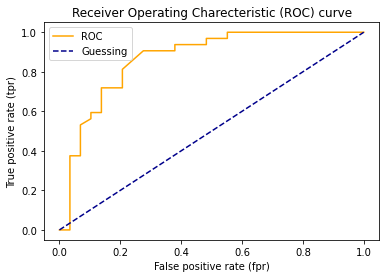

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', label='Guessing', linestyle='--')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Charecteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive) # This is the are under our ROC curve (ideal case area = 1)

0.8669181034482759

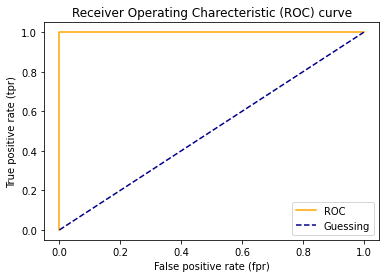

In [115]:
# Perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [116]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
y_preds = clf.predict(X_test)

In [119]:
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [120]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [121]:
import sys
sys.prefix

'C:\\Users\\Administrator\\Desktop\\Data-Science-Legwork\\ZTM-Data-Science\\env'

In [122]:
# Bonus hack: Installing a conda package from within a Jupyter Notebook into the current environment
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



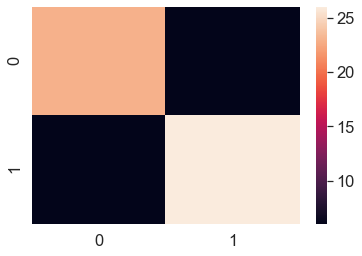

In [123]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

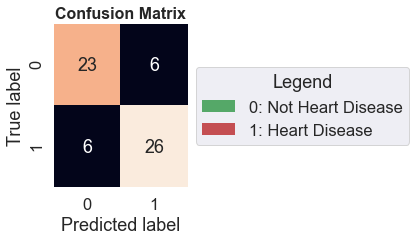

In [124]:
def plot_conf_mat(conf_mat):
    '''
    Plot a confusion matrix using Seaborn's heatmap
    '''
    from matplotlib.patches import Rectangle
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    ax.set(xlabel='Predicted label',
          ylabel='True label')
    ax.set_title('Confusion Matrix', {'fontsize': 16,
                                     'fontweight': 'bold'}) # Specific setter methods provide more control over parameters like fontsize and fontweight
    extra1 = Rectangle((0, 0), 1, 1, fc="g", fill=True, edgecolor='none', linewidth=0)
    extra2 = Rectangle((0, 0), 1, 1, fc="r", fill=True, edgecolor='none', linewidth=0)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(handles=[extra1,extra2],labels=('0: Not Heart Disease', '1: Heart Disease'),title='Legend', loc='center left',bbox_to_anchor=(1, 0.5));

plot_conf_mat(conf_mat)

In [125]:
from sklearn.metrics import plot_confusion_matrix

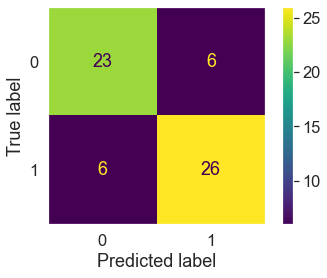

In [126]:
# Convenience function from sklearn
plot_confusion_matrix(clf, X_test, y_test)
plt.grid(False);

### Classification Report 

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [128]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

print(classification_report(disease_true, disease_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\Administrator\Desktop\Data-Science-Legwork\ZTM-Data-Science\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


To summarize evaluation metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. for binary classification, same amount of samples which are labelled with 0 and 1).
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

#### 4.2.2 Regression model evaluation metrics

Documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 or coefficient of determination.
2. Mean absolute error (MAE).
3. Mean squared error (MSE).

**R^2**

What R^2 does: Compares your model's predictions to the mean of the target. Values can range from negative infinity (a very pooor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers, its R^2 would be 1.

In [129]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [130]:
model.score(X_test, y_test) # the default metric used here by RandomForestRegressor is R^2

0.8654448653350507

In [131]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(y_test.shape, y_test.mean()) # Useful numpy function

In [132]:
r2_score(y_test, y_test_mean) # As expected, we get an R^2 of 0

0.0

In [133]:
r2_score(y_test, y_test) # As expected, we get an R^2 of 1

1.0

In [134]:
r2_score(y_test, np.random.random(y_test.shape)) # Simply predicting random values gives a negative R^2 indiating that the predictions are poor

-6.003222167567903

**Mean absolute error(MAE)**
MAE is the averaeg of absolute differences between preditions and actual values. It gives you an idea of how wrong your model predictions are on average.

In [135]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [136]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [137]:
df['absolute error'] = (df['actual values'] - df['predicted values']).abs()

In [138]:
df['absolute error']

173    0.519
274    1.826
491    3.159
72     0.660
452    0.793
       ...  
412    4.741
436    2.876
411    3.588
86     2.295
75     2.432
Name: absolute error, Length: 102, dtype: float64

In [139]:
df['absolute error'].mean() # As expected, this matches with mae calculated before

2.136382352941176

**Mean squared error (MSE)**

In [140]:
# Mean squared error
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_preds)

9.867437068627442

### Finally using the `scoring` parameter

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [142]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [143]:
# Cross-valdiated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [144]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [145]:
# Cross validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
print(f'The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%')

The cross-validated precision is: 83.30%


In [146]:
# Cross validated recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
print(f'The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated recall is: 85.45%


In [147]:
# Cross validated f1
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(f'The cross-validated f1 is: {np.mean(cv_f1)*100:.2f}%')

The cross-validated f1 is: 84.27%


How about our regression model?

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [149]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [150]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae # Scikit uses neg_mean_absolute error because it uses the convention 'higher is better' for scoring

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [151]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

### 4.3 Using different evaluation metrics as Scikit-Learn functions 

#### Classification evaluation functions

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds)*100:.2f}%')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


#### Regression evaluation functions 

In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test,y_preds)}')
print(f'MAE: {mean_absolute_error(y_test,y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


### Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a mdoel perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model finds these patterns in data.
* Hyperparamaters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [154]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [155]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

In [156]:
# baseline hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_preds labels
    on a classification problem.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': accuracy,
                  'precision': precision,
                  'recall': recall,
                  'f1': f1}
    return metric_dict

In [189]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier() # baseline classifier

In [190]:
clf.get_params() # baseline hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [192]:
# Train the classifier
clf.fit(X_train, y_train)

# Make baseline predictions on validation set
y_preds = clf.predict(X_valid)

# Evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

{'accuracy': 0.8444444444444444,
 'precision': 0.8461538461538461,
 'recall': 0.88,
 'f1': 0.8627450980392156}

In [185]:
np.random.seed(42)
# Let's tweak n_estimators

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions using tweaked classifier
y_preds_2 = clf_2.predict(X_valid)

# Evaluate tweaked classifier on valdation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

{'accuracy': 0.8222222222222222,
 'precision': 0.8148148148148148,
 'recall': 0.88,
 'f1': 0.8461538461538461}

#### Clearly, tuning hyperparamters by hand is extremely time consuming and luck-based 

In [162]:
import pandas as pd
import numpy as np

### 5.2 Tuning hyperparameters using RandomizedSearchCV 

In [163]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {
    'n_estimators': [10, 100, 200, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [164]:
from sklearn.ensemble import RandomForestClassifier
heart_disease = pd.read_csv('../data/heart-disease.csv')

In [165]:
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

# No need to create separate validation sets, RandomizedSearchCV has cross valiation built in
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_lea

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [166]:
rs_clf.best_params_ # these are the best hyperparameetrs based on RandomForestClassifier's default scoring metric i.e. mean_accuracy

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [167]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

In [168]:
rs_metrics

{'accuracy': 0.8360655737704918,
 'precision': 0.8709677419354839,
 'recall': 0.8181818181818182,
 'f1': 0.84375}

In [169]:
RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test)

0.7868852459016393

### As can be seen above, tuned model using RandomizedSearchCV outperperforms baseline model on the accuracy metric 

## However, there is no gurantee that the tuned model will perform better than baseline model because it randomly tries a set of hyperparameters and is in no way exhaustive in considering all possible combinations of hyperparameters.

### Hyperparameter tuning with GridSearchCV 

In [170]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [172]:
6*5*2*3*3*5 # Number of iterations needed for GridSearchCV using above grid, assuming 5 fold cross validation

2700

#### for the above grid, a lot of compute power/ time will be needed to carry out GridSearchCV.
Let's use a smaller grid.

In [171]:
# Use results from hyperparameter tuning by hand and RandomizedSaerchCV to influence search space for GridSearchCV
grid_2 = {
 'n_estimators': [100, 200, 500],
 'max_depth': [None , 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 6],
 'min_samples_leaf': [2, 4]
}

In [173]:
3*2*2*2*2*5 # Number of iterations needed for GridSearchCV using grid_2, assuming 5 fold cross validation

240

In [174]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# No need to create separate validation sets, RandomizedSearchCV has cross valiation built in
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samp

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.5s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.1min finished


In [175]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 500}

In [176]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

gs_metrics

{'accuracy': 0.8032786885245902,
 'precision': 0.8387096774193549,
 'recall': 0.7878787878787878,
 'f1': 0.8125}

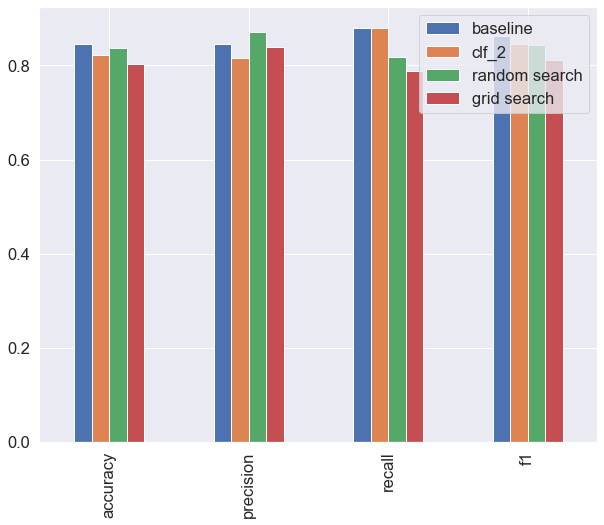

In [193]:
compare_metrics = pd.DataFrame({
    'baseline': baseline_metrics,
    'clf_2': clf_2_metrics,
    'random search': rs_metrics,
    'grid search': gs_metrics
})

compare_metrics.plot.bar(figsize=(10,8));

# There's a slight error in the above plot, metrics should always be compared on the same test test! 

### 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module.
2. WIth the `joblib` module

**Pickle**

In [194]:
import pickle

# Save an existing model to a file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb')) # Saves model in current repository

In [195]:
# Load a saved pickle model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [196]:
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

#### You can use the above trained model to make predictions on new test data right away! 

**Joblib**

In [197]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [198]:
# Import a saved joblib model
loaded_job_model = load(filename='gs_random_forest_model_1.joblib')

In [199]:
loaded_job_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

https://scikit-learn.org/stable/modules/model_persistence.html

### 7. Putting it all together !

In [200]:
data = pd.read_csv('../data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [201]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [203]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data


In [205]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('../data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_feature),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21735623151692096

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [208]:
# Use GridSearchCV with our regression Pipeline (we have to use double underscores here)
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV with our regression Pipeline
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
}

In [209]:
gs_model = GridSearchCV(estimator=model,
                        param_grid=pipe_grid,
                        cv = 5,
                        verbose = 2)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [210]:
gs_model.score(X_test, y_test)

0.3361674380305706